# Fitting Models Exercise 1

## Imports

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

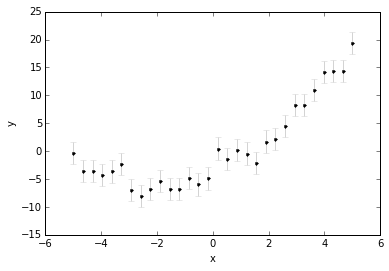

In [43]:
# YOUR CODE HERE
xdata=np.linspace(-5,5,30)
N=30
dy=2.0
def ymodel(a,b,c):
    return a*x**2+b*x+c
ydata = a_true*x**2 + b_true * x + c_true + np.random.normal(0.0, dy, size=N)

plt.errorbar(xdata, ydata, dy,
             fmt='.k', ecolor='lightgray')
plt.xlabel('x')
plt.ylabel('y');

In [ ]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [40]:
# YOUR CODE HERE
def chi2(theta, x, y, dy):
    # theta = [b, m]
    return np.sum(((y - theta[0] - theta[1] * x) / dy) ** 2)

def manual_fit(a, b, c):
    modely = a*xdata**2 + b*xdata +c
    plt.plot(xdata, modely)
    plt.errorbar(xdata, ydata, dy,
             fmt='.k', ecolor='lightgray')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.text(1, 15, 'a={0:.2f}'.format(a))
    plt.text(1, 12.5, 'b={0:.2f}'.format(b))
    plt.text(1, 10, 'c={0:.2f}'.format(c))
    plt.text(1, 8.0, '$\chi^2$={0:.2f}'.format(chi2([a,b,c],xdata,ydata, dy)))



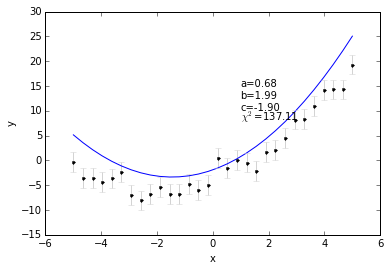

In [42]:
interact(manual_fit, a=(-3.0,3.0,0.01), b=(0.0,4.0,0.01),c=(-5,5,0.1));

In [49]:
def deviations(theta, x, y, dy):
    return (y - theta[0] - theta[1] * x) / dy

result = opt.leastsq(deviations, theta_guess, args=(xdata, ydata, dy), full_output=True)

theta_best = result[0]
theta_cov = result[1]
theta_mov = result[2]
print('a = {0:.3f} +/- {1:.3f}'.format(theta_best[0], np.sqrt(theta_cov[0,0])))
print('b = {0:.3f} +/- {1:.3f}'.format(theta_best[1], np.sqrt(theta_cov[1,1])))
print('c = {0:.3f} +/- {1:.3f}'.format(theta_best[2], np.sqrt(theta_cov[2,2])))




a = 0.666 +/- 0.365
b = 2.068 +/- 0.122


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors